<a href="https://colab.research.google.com/github/Sahar-DataScience/arabic-ocr/blob/main/EasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install matplotlib==3.7.1

In [ ]:
!pip install numpy==1.25.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2


In [ ]:
!pip install opencv-python-headless

In [ ]:
!pip install torch

In [ ]:
!pip install torchvision>=0.5

In [ ]:
!pip install easyocr

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import cv2
import easyocr

In [ ]:
img = cv2.imread('/content/drive/MyDrive/project_test/Screenshot 2024-02-20 224325.png', 0)
blur = cv2.GaussianBlur(img,(5,5),0)
reader = easyocr.Reader(['ar'])
result = reader.readtext(blur)
msg =''
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

Text: انونة شتنط لامم مر نم, Probability: 0.1358212072296597
Text: مرر, Probability: 0.16519782165550476
Text: لدلان, Probability: 0.21231136247822138
Text: لرمرر, Probability: 0.038866130912116825
Text: نلا لمدى, Probability: 0.24767027861176785
Text: , Probability: 0.0
Text: ر- 16 ~3 رمد, Probability: 0.034362257201348424


In [ ]:
msg = ''
for (bbox, text, prob) in result:
    #print(f'Text: {text}, Probability: {prob}')
    msg +=' '+ text
print(msg)

 انونة شتنط لامم مر نم مرر لدلان لرمرر نلا لمدى  ر- 16 ~3 رمد


In [ ]:
result

[[[[89, 54], [326, 54], [326, 123], [89, 123]],
  'الثورة نيوز',
  0.9375326942610053],
 [[[75, 161], [320, 161], [320, 199], [75, 199]],
  'تونس ف 2014/07/11',
  0.9817705492167859],
 [[[390, 162], [473, 162], [473, 189], [390, 189]],
  'الحمد لله',
  0.2259987915080018],
 [[[812, 153], [859, 153], [859, 185], [812, 185]],
  '١١ ١',
  0.32778310224715795],
 [[[622, 178], [882, 178], [882, 252], [622, 252]],
  '?03$ 96',
  0.2099149141890483],
 [[[918, 186], [978, 186], [978, 234], [918, 234]], ')0', 0.9701563724495598],
 [[[969, 181], [1035, 181], [1035, 251], [969, 251]],
  '/(',
  0.5131052571749335],
 [[[432, 203], [643, 203], [643, 283], [432, 283]],
  'شحا',
  0.46835383772850037],
 [[[285, 293], [671, 293], [671, 356], [285, 356]],
  'المعترء وحيل البممورية',
  0.36785713593713126],
 [[[768, 298], [856, 298], [856, 346], [768, 346]],
  'بناب',
  0.5414814933713945],
 [[[207, 375], [873, 375], [873, 451], [207, 451]],
  'الابتدائية بتونس داء عفظس ما يلج ',
  0.11481151122852601],

In [ ]:
x_min, y_min = [int(min(cord)) for cord in zip(*result[0][0])]
x_max, y_max = [int(max(cord)) for cord in zip(*result[0][0])]
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

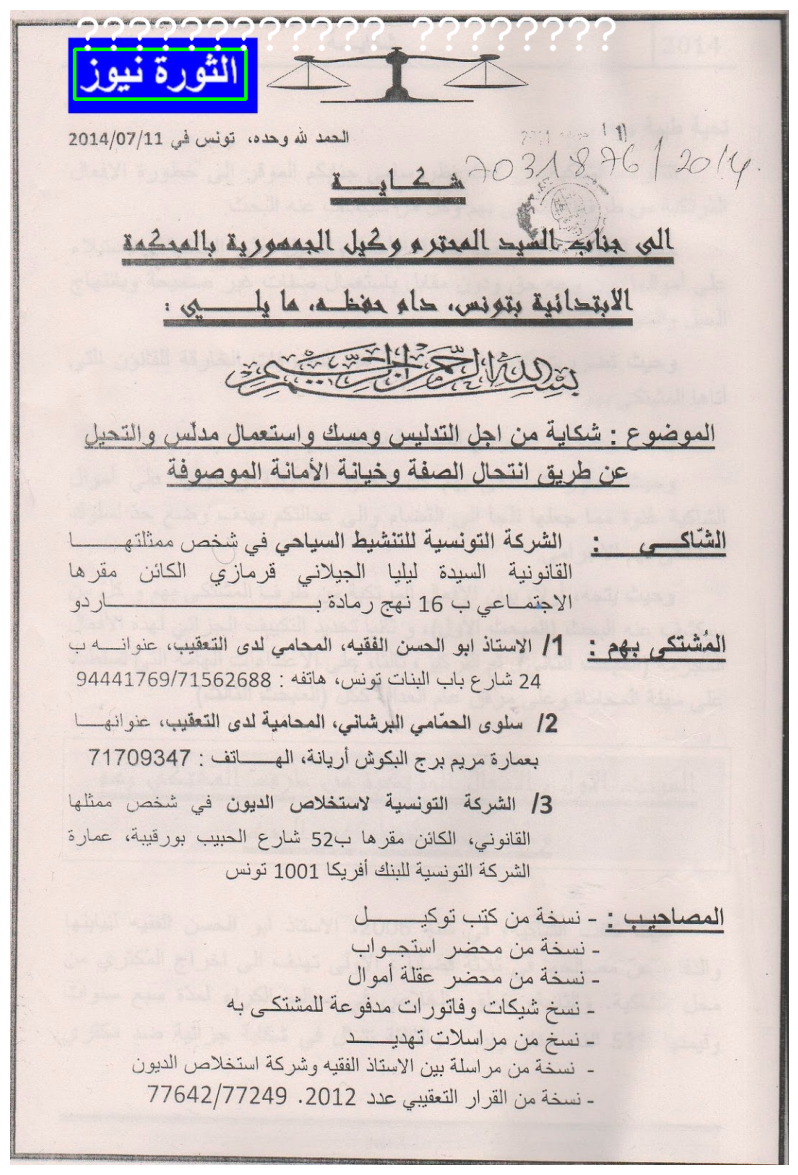

In [ ]:
image = cv2.imread('/content/drive/MyDrive/project_test/image 1.jpg')
image = cv2.rectangle(image, (x_min,y_min),(x_max,y_max),(0,255,0),3)
image = cv2.putText(image, text, (x_min, y_min),font, 2, (255, 255, 255),3, cv2.LINE_AA)
fig, ax = plt.subplots(figsize = (15,15))
ax.imshow(image)
ax.axis('off')
plt.show()

In [ ]:
cropping = False

x_start, y_start, x_end, y_end = 0, 0, 0, 0

image = cv2.imread('/content/drive/MyDrive/project_test/image 1.jpg')
oriImage = image.copy()


def mouse_crop(event, x, y, flags, param):
    # grab references to the global variables
    global x_start, y_start, x_end, y_end, cropping

    # if the left mouse button was DOWN, start RECORDING
    # (x, y) coordinates and indicate that cropping is being
    if event == cv2.EVENT_LBUTTONDOWN:
        x_start, y_start, x_end, y_end = x, y, x, y
        cropping = True

    # Mouse is Moving
    elif event == cv2.EVENT_MOUSEMOVE:
        if cropping == True:
            x_end, y_end = x, y

    # if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates
        x_end, y_end = x, y
        cropping = False # cropping is finished

        refPoint = [(x_start, y_start), (x_end, y_end)]

        if len(refPoint) == 2: #when two points were found
            roi = oriImage[refPoint[0][1]:refPoint[1][1], refPoint[0][0]:refPoint[1][0]]
            cv2.imshow("Cropped", roi)

cv2.namedWindow("image")
cv2.setMouseCallback("image", mouse_crop)

while True:

    i = image.copy()

    if not cropping:
        cv2.imshow("image", image)

    elif cropping:
        cv2.rectangle(i, (x_start, y_start), (x_end, y_end), (255, 0, 0), 2)
        cv2.imshow("image", i)

    cv2.waitKey(1)

# close all open windows
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Create point matrix get coordinates of mouse click on image
point_matrix = np.zeros((2,2),int)

counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    # Left button mouse click event opencv
    if event == cv2.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1

# Read image
img = cv2.imread('/content/drive/MyDrive/project_test/image 1.jpg')

while True:
    for x in range (0,2):
        cv2.circle(img,(point_matrix[x][0],point_matrix[x][1]),3,(0,255,0),cv2.FILLED)

    if counter == 2:
        starting_x = point_matrix[0][0]
        starting_y = point_matrix[0][1]

        ending_x = point_matrix[1][0]
        ending_y = point_matrix[1][1]
        # Draw rectangle for area of interest
        cv2.rectangle(img, (starting_x, starting_y), (ending_x, ending_y), (0, 255, 0), 3)

        # Cropping image
        img_cropped = img[starting_y:ending_y, starting_x:ending_x]
        cv2_imshow(img_cropped)
    #cv2.namedWindow("image")
    # Showing original image
    cv2_imshow(img)
    # Mouse click event on original image
    cv2.setMouseCallback("image",mousePoints)
    #cv2.setMouseCallback("video", drawLine)
    # Printing updated point matrix
    print(point_matrix)
    # Refreshing window all time
    cv2.waitKey(1)

In [ ]:
counter

0